<a href="https://colab.research.google.com/github/luizpramos/dados/blob/master/Estudo_Dirigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estudo Dirigido**

#Luiz Fernando Pinheiro Ramos

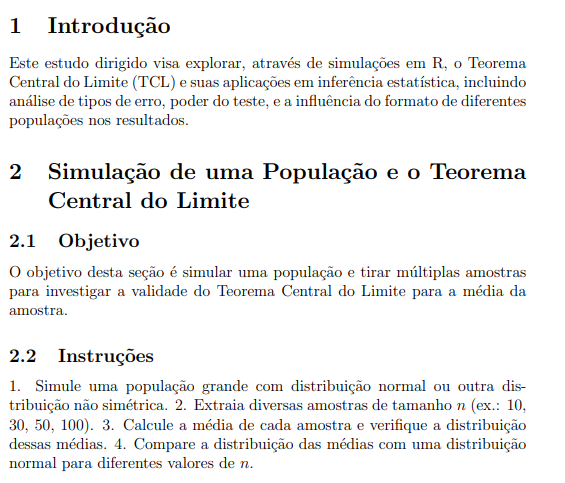

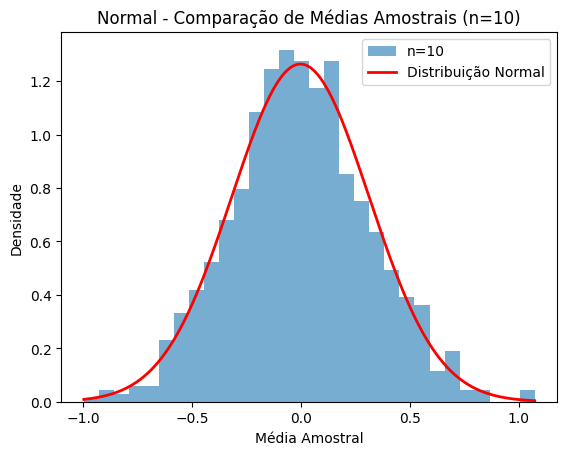

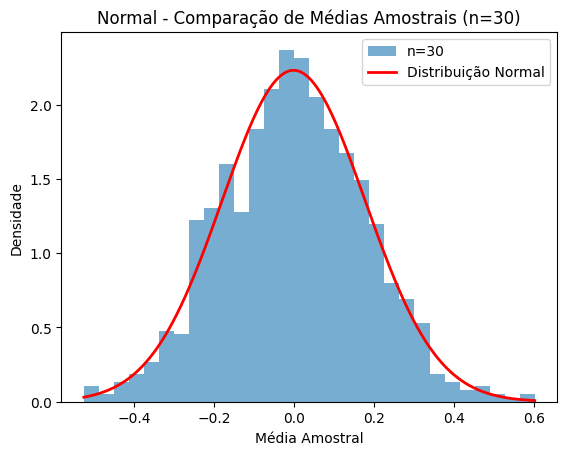

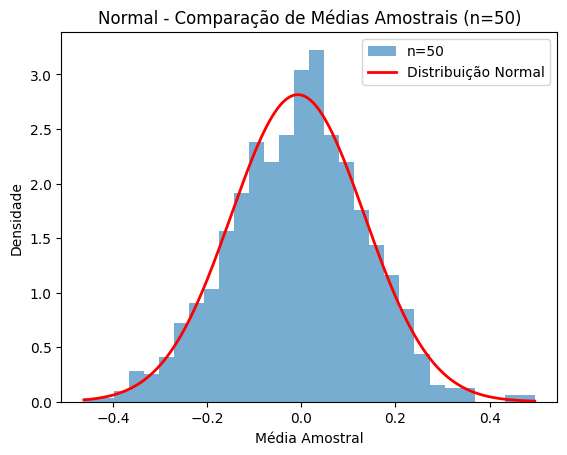

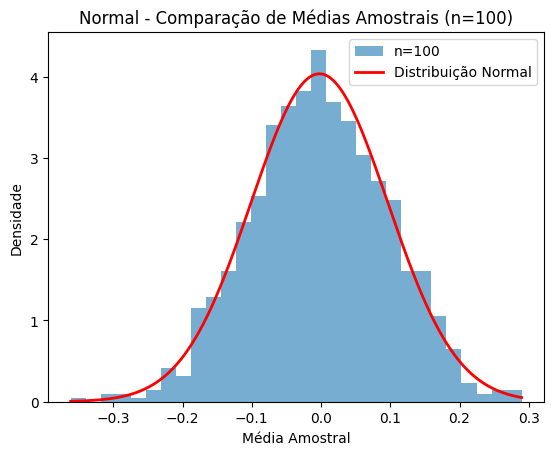

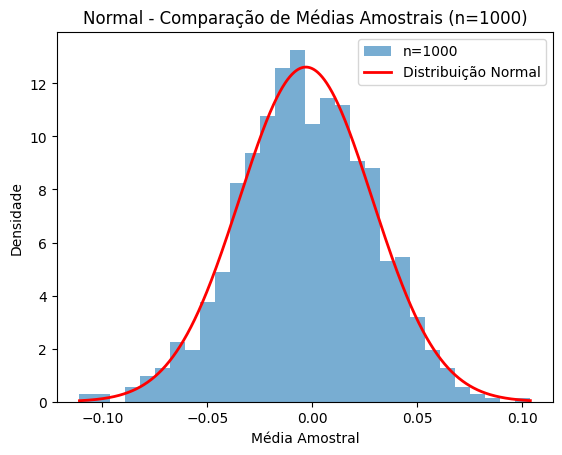

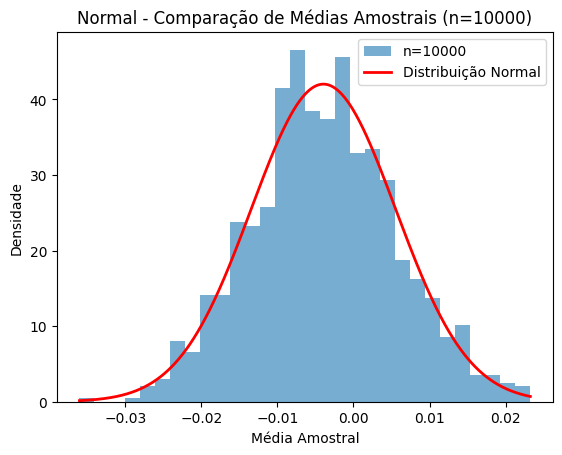

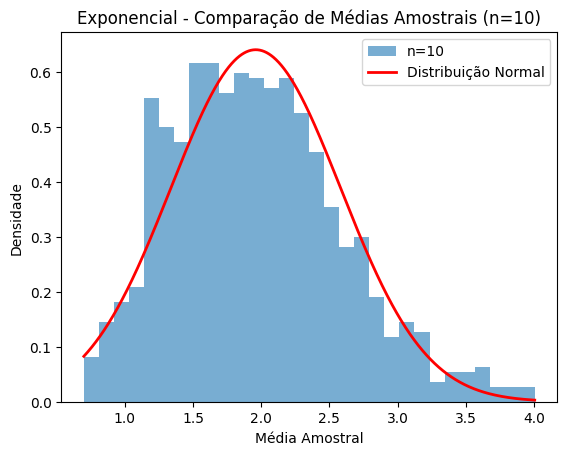

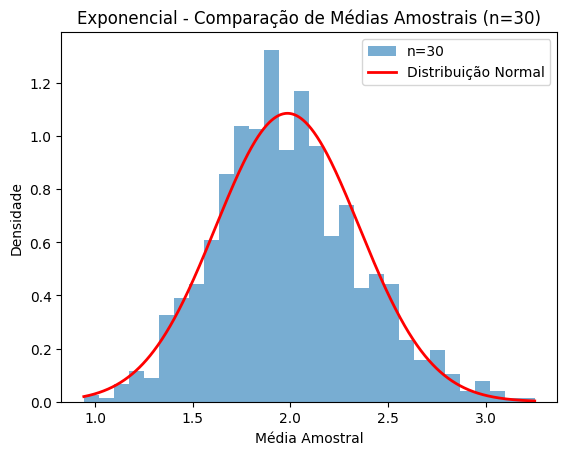

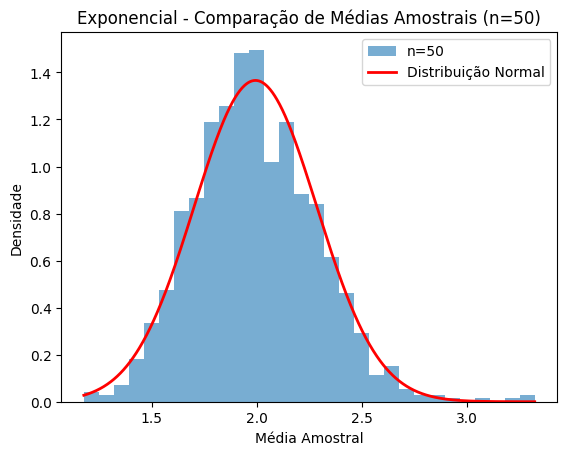

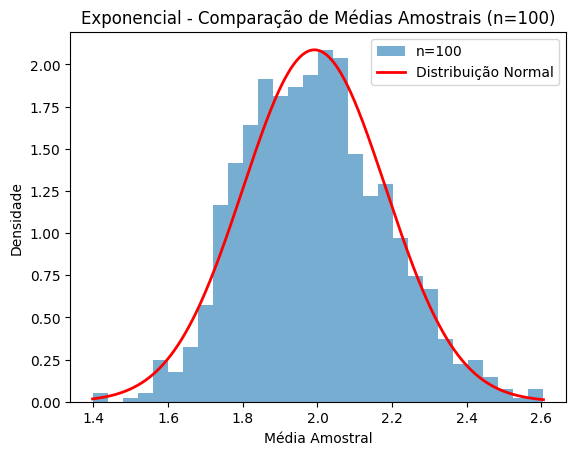

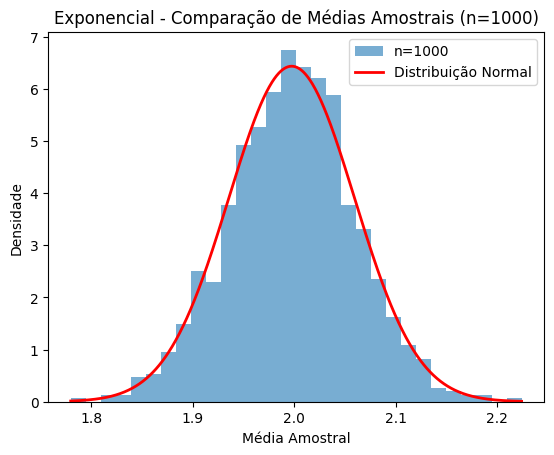

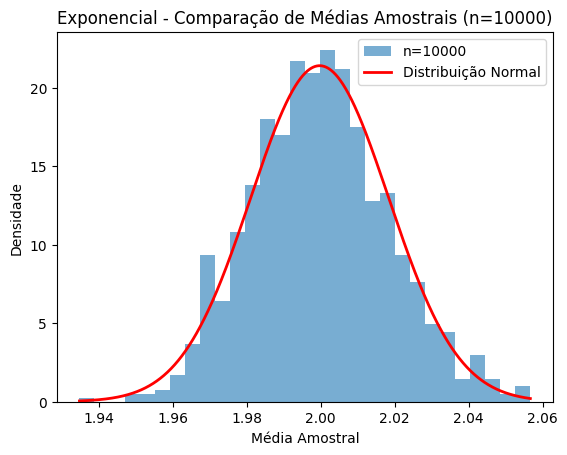

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Criar populações com diferentes distribuições
population_size = 100000
distributions = {
    'Normal': np.random.normal(loc=0, scale=1, size=population_size),
    'Exponencial': np.random.exponential(scale=2, size=population_size)
}

# 2. Tamanhos de amostras a analisar
sample_sizes = [10, 30, 50, 100, 1000, 10000]
num_samples = 1000

# Armazenar médias amostrais por distribuição e tamanho de amostra
sample_means_dist = {}

for dist_name, population in distributions.items():
    sample_means_dist[dist_name] = {}
    for n in sample_sizes:
        sample_means_dist[dist_name][n] = [
            np.mean(np.random.choice(population, n, replace=False)) for _ in range(num_samples)
        ]

# 3. Comparar as distribuições de médias amostrais
for dist_name, means_by_size in sample_means_dist.items():
    for n, means in means_by_size.items():
        plt.hist(means, bins=30, density=True, alpha=0.6, label=f'n={n}')

        # Ajustar uma curva normal sobre os dados
        mu, sigma = np.mean(means), np.std(means)
        x = np.linspace(min(means), max(means), 1000)
        normal_pdf = stats.norm.pdf(x, mu, sigma)
        plt.plot(x, normal_pdf, label='Distribuição Normal', color='red', linewidth=2)

        plt.title(f'{dist_name} - Comparação de Médias Amostrais (n={n})')
        plt.xlabel('Média Amostral')
        plt.ylabel('Densidade')
        plt.legend()
        plt.show()


Os gráficos apresentados mostram a distribuição das médias amostrais para diferentes tamanhos de amostra (n=10, 30, 50, 100, 1000, 10000) extraídas de uma população com distribuição assimétrica (exponencial) e de uma população normal.

Na distribuição exponencial, a medida que o tamanho da amostra aumenta, as distribuições das médias amostrais se aproximam de uma distribuição normal, conforme esperado pelo Teorema Central do Limite. Essa convergência pode ser observada comparando os histogramas das médias amostrais com a curva de uma distribuição normal ajustada.

Já na distribuição normal, as médias amostrais já seguem bem a distribuição normal, mesmo para n pequenos.

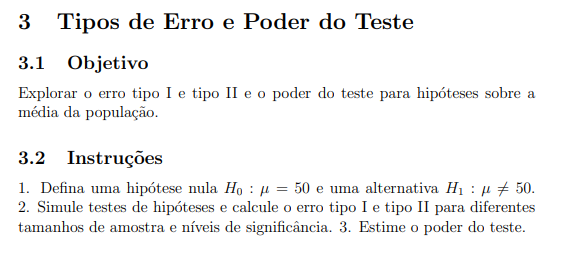

In [2]:
import numpy as np
from scipy.stats import norm

# 1. Definir parâmetros iniciais
mu_null = 50  # Média sob H0
mu_alt = 52   # Média sob H1 (deslocada para simular alternativa)
sigma = 10    # Desvio padrão conhecido
alpha_levels = [0.01, 0.05, 0.1]  # Níveis de significância
sample_sizes = [10, 30, 50, 100, 200]  # Tamanhos de amostra
num_simulations = 10000  # Número de simulações

# 2. Armazenar resultados
results = []

# 3. Simular testes para diferentes tamanhos de amostra e níveis de significância
for n in sample_sizes:
    for alpha in alpha_levels:
        # Definir limites críticos sob H0
        critical_value_low = mu_null + norm.ppf(alpha / 2) * (sigma / np.sqrt(n))
        critical_value_high = mu_null + norm.ppf(1 - alpha / 2) * (sigma / np.sqrt(n))

        # Simular amostras sob H0
        samples_null = np.random.normal(loc=mu_null, scale=sigma, size=(num_simulations, n))
        sample_means_null = np.mean(samples_null, axis=1)

        # Calcular erro tipo I (rejeitar H0 quando ela é verdadeira)
        type_I_error = np.mean((sample_means_null < critical_value_low) | (sample_means_null > critical_value_high))

        # Simular amostras sob H1
        samples_alt = np.random.normal(loc=mu_alt, scale=sigma, size=(num_simulations, n))
        sample_means_alt = np.mean(samples_alt, axis=1)

        # Calcular erro tipo II (não rejeitar H0 quando H1 é verdadeira)
        type_II_error = np.mean((sample_means_alt >= critical_value_low) & (sample_means_alt <= critical_value_high))

        # Calcular poder do teste (1 - erro tipo II)
        power = 1 - type_II_error

        # Armazenar resultados
        results.append({
            "Sample Size": n,
            "Alpha": alpha,
            "Type I Error": type_I_error,
            "Type II Error": type_II_error,
            "Power": power
        })

# 4. Mostrar os resultados em um DataFrame
import pandas as pd

results_df = pd.DataFrame(results)
results_df

,Sample Size,Alpha,Type I Error,Type II Error,Power
0,10,0.01,0.0107,0.9725,0.0275
1,10,0.05,0.0557,0.9042,0.0958
2,10,0.10,0.1005,0.8283,0.1717
3,30,0.01,0.0094,0.9269,0.0731
4,30,0.05,0.0478,0.7990,0.2010
5,30,0.10,0.0986,0.6996,0.3004
6,50,0.01,0.0090,0.8775,0.1225
7,50,0.05,0.0476,0.7057,0.2943
8,50,0.10,0.1032,0.5868,0.4132
9,100,0.01,0.0088,0.7193,0.2807


O erro do Tipo I ficou proximo do valor do nível de significância, conforme esperado.

Conforme a amostra aumenta, o erro do Tipo II diminui, refletindo em um poder do teste maior.

Mantendo a amostra fixa e aumentando o nível de significância, o erro do Tipo II diminui, refletindo em um poder do teste maiora (teste menos rigoroso).


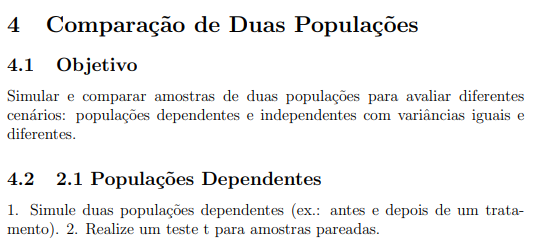

In [3]:
import numpy as np
import scipy.stats as stats

# 1. Simular duas populações dependentes (ex.: antes e depois de um tratamento)
np.random.seed(42)
n = 30  # Tamanho da amostra
before_treatment = np.random.normal(loc=50, scale=5, size=n)  # Antes do tratamento
after_treatment = before_treatment + np.random.normal(loc=-2, scale=3, size=n)  # Depois do tratamento (efeito esperado)

# 2. Realizar um teste t para amostras pareadas
t_stat, p_value = stats.ttest_rel(before_treatment, after_treatment)

# Exibir os resultados
print("Média antes do tratamento:", np.mean(before_treatment))
print("Média depois do tratamento:", np.mean(after_treatment))
print("Estatística t:", t_stat)
print("Valor p:", p_value)

# Interpretação
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Resultado: Existe uma diferença significativa entre os grupos (p < 0.05).")
else:
    print("Resultado: Não existe uma diferença significativa entre os grupos (p >= 0.05).")


Média antes do tratamento: 49.05926552074481
Média depois do tratamento: 46.69577810987498
Estatística t: 4.63441919455945
Valor p: 6.999530738574583e-05
Resultado: Existe uma diferença significativa entre os grupos (p < 0.05).


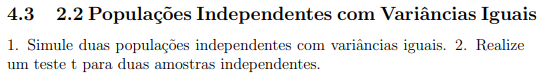

In [4]:
# 1. Simular duas populações independentes com variâncias iguais
np.random.seed(42)
n1, n2 = 30, 30  # Tamanhos das amostras
population1 = np.random.normal(loc=50, scale=5, size=n1)  # População 1
population2 = np.random.normal(loc=52, scale=5, size=n2)  # População 2 (média diferente, mas variância igual)

# 2. Realizar um teste t para duas amostras independentes assumindo variâncias iguais
t_stat, p_value = stats.ttest_ind(population1, population2, equal_var=True)

# Exibir os resultados
print("Média da População 1:", np.mean(population1))
print("Média da População 2:", np.mean(population2))
print("Estatística t:", t_stat)
print("Valor p:", p_value)

# Interpretação
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Resultado: Existe uma diferença significativa entre as populações (p < 0.05).")
else:
    print("Resultado: Não existe uma diferença significativa entre as populações (p >= 0.05).")


Média da População 1: 49.05926552074481
Média da População 2: 51.39418764855029
Estatística t: -1.9751555355027914
Valor p: 0.05301625538101499
Resultado: Não existe uma diferença significativa entre as populações (p >= 0.05).


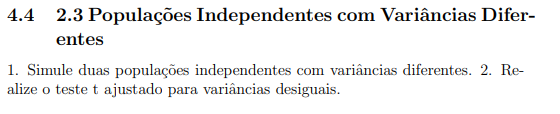

In [5]:
# 1. Simular duas populações independentes com variâncias diferentes
np.random.seed(42)
n1, n2 = 30, 30  # Tamanhos das amostras
population1 = np.random.normal(loc=50, scale=5, size=n1)  # População 1 (variância menor)
population2 = np.random.normal(loc=52, scale=10, size=n2)  # População 2 (variância maior)

# 2. Realizar um teste t ajustado para variâncias desiguais
t_stat, p_value = stats.ttest_ind(population1, population2, equal_var=False)

# Exibir os resultados
print("Média da População 1:", np.mean(population1))
print("Média da População 2:", np.mean(population2))
print("Estatística t:", t_stat)
print("Valor p:", p_value)

# Interpretação
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Resultado: Existe uma diferença significativa entre as populações (p < 0.05).")
else:
    print("Resultado: Não existe uma diferença significativa entre as populações (p >= 0.05).")


Média da População 1: 49.05926552074481
Média da População 2: 50.788375297100565
Estatística t: -0.915803079252225
Valor p: 0.3650177232803089
Resultado: Não existe uma diferença significativa entre as populações (p >= 0.05).


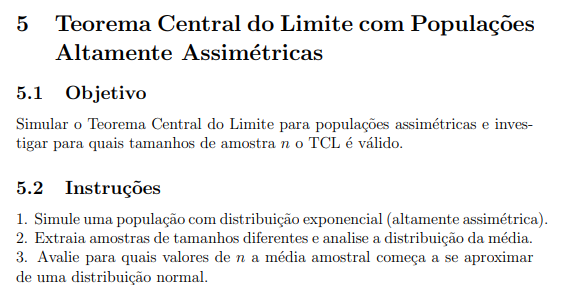

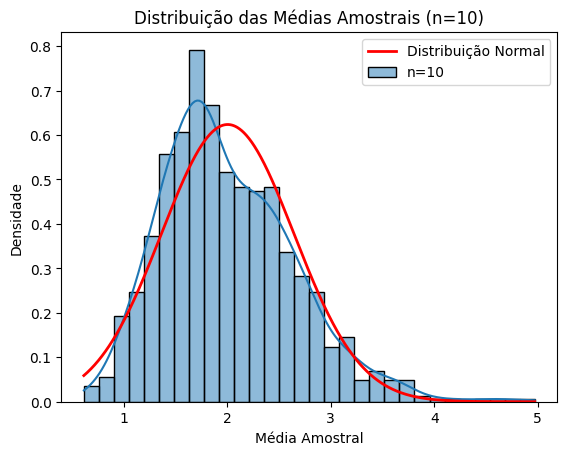

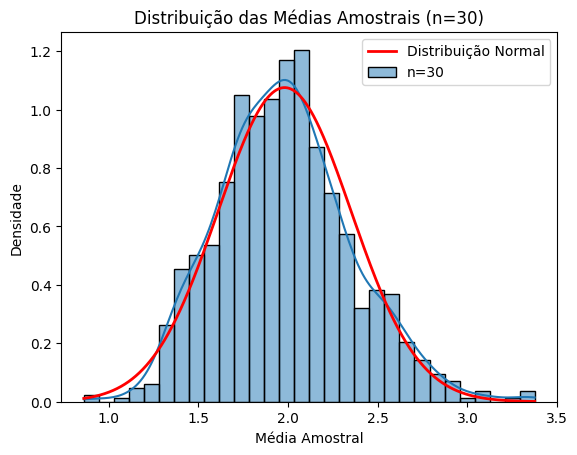

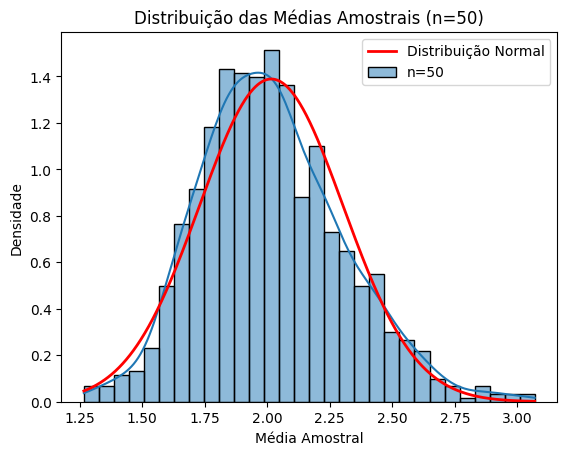

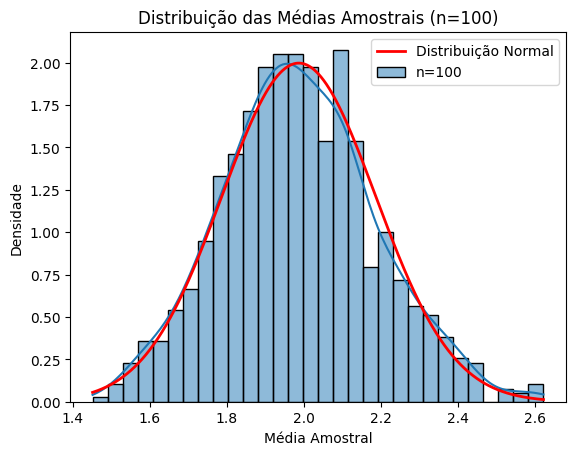

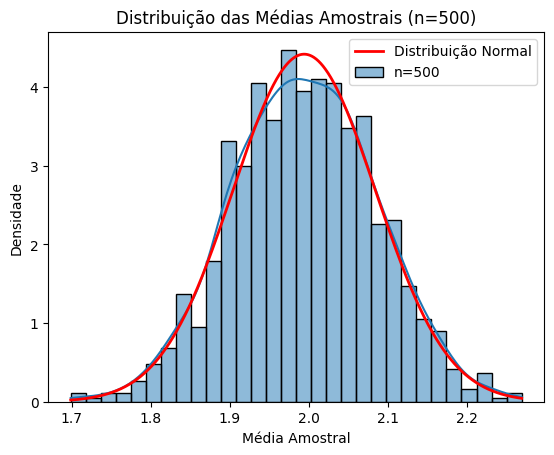

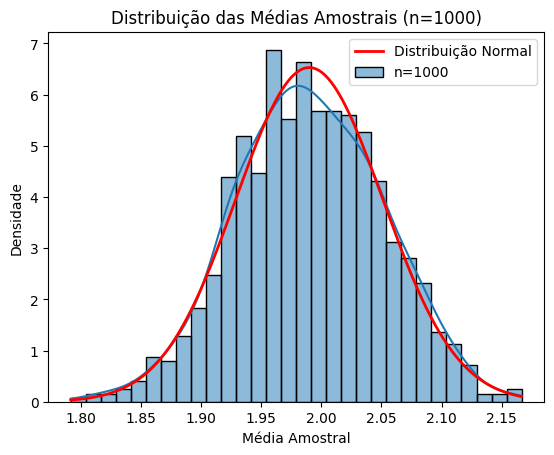

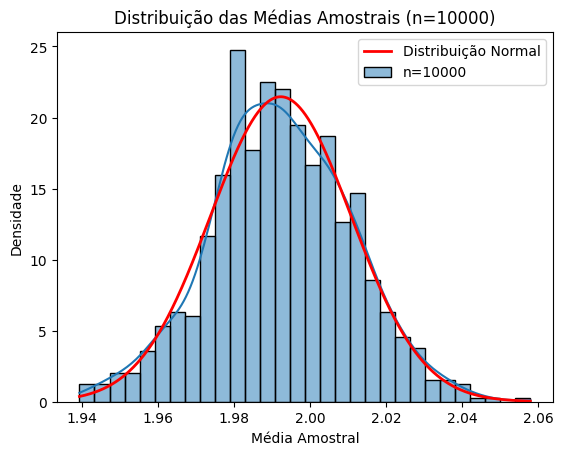

Skewness para n=10: 0.7351 (aproximação da simetria quando skewness ~ 0)
Skewness para n=30: 0.3851 (aproximação da simetria quando skewness ~ 0)
Skewness para n=50: 0.4510 (aproximação da simetria quando skewness ~ 0)
Skewness para n=100: 0.2018 (aproximação da simetria quando skewness ~ 0)
Skewness para n=500: -0.0129 (aproximação da simetria quando skewness ~ 0)
Skewness para n=1000: -0.0203 (aproximação da simetria quando skewness ~ 0)
Skewness para n=10000: 0.0105 (aproximação da simetria quando skewness ~ 0)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 1. Simular uma população com distribuição exponencial (altamente assimétrica)
np.random.seed(42)
population_size = 100000
population = np.random.exponential(scale=2, size=population_size)

# 2. Extrair amostras de tamanhos diferentes e calcular a média
sample_sizes = [10, 30, 50, 100, 500, 1000, 10000]
num_samples = 1000

# Armazenar médias amostrais para cada tamanho de amostra
sample_means = {}

for n in sample_sizes:
    sample_means[n] = [np.mean(np.random.choice(population, n, replace=False)) for _ in range(num_samples)]

# 3. Analisar a distribuição das médias amostrais
for n in sample_sizes:
    means = sample_means[n]
    sns.histplot(means, kde=True, bins=30, stat="density", label=f'n={n}', color=None)

    # Ajustar uma curva normal
    mu, sigma = np.mean(means), np.std(means)
    x = np.linspace(min(means), max(means), 1000)
    normal_pdf = norm.pdf(x, mu, sigma)
    plt.plot(x, normal_pdf, label='Distribuição Normal', color='red', linewidth=2)

    plt.title(f'Distribuição das Médias Amostrais (n={n})')
    plt.xlabel('Média Amostral')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

# Conclusão do TCL: Identificar o valor mínimo de n onde a distribuição se aproxima da normal
for n in sample_sizes:
    means = sample_means[n]
    skewness = (np.mean((means - np.mean(means))**3) / (np.std(means)**3))
    print(f"Skewness para n={n}: {skewness:.4f} (aproximação da simetria quando skewness ~ 0)")


A medida que o tamanho da amostra aumenta a distribuição se aproximada da normal e o coeficiente de simetria vai ficando próximo de zero.